In [14]:
# Set up stlab
from pyplr import stlab
d = stlab.SpectraTuneLab(password='2294b16eea08a15a')
d.turn_off()

LIGHT HUB login success
User authenticated as: admin
The following addresses are defined: [1, 1004, 1023]
Call get_luminaires() / get_device_info() for more info


<Response [200]>

In [15]:
from time import sleep
from pyplr.pupil import PupilCore

p = PupilCore()

p.command('R our_recording')

sleep(1)

p.command('r')

'OK'

In [16]:
p.check_3d_model()

> Refit the 3d model? [y/n]:  y


> Unfreezing 3d model for eye 0
> Unfreezing 3d model for eye 1
> Ask the participant to roll their eyes


> Press "Enter" when ready to freeze the model:  


> Freezing 3d model for eye 0
> Freezing 3d model for eye 1


In [17]:
p = PupilCore()
pgr_future = p.pupil_grabber(topic='pupil.1.3d', seconds=5)

> Grabbing 5 seconds of pupil.1.3d


In [18]:
data = pgr_future.result()
data[0]

> PupilGrabber done grabbing 5 seconds of pupil.1.3d


{'id': 1,
 'topic': 'pupil.1.3d',
 'method': 'pye3d 0.3.0 real-time',
 'norm_pos': [0.3346664887994759, 0.5905057479932667],
 'diameter': 54.55698093936821,
 'confidence': 0.8921345472335815,
 'timestamp': 867917.307306,
 'sphere': {'center': [2.282855908912683,
   1.6966922440787389,
   38.06869777807302],
  'radius': 10.392304845413264},
 'projected_sphere': {'center': [112.82204680654016, 108.52133235850783],
  'axes': [185.27558803260158, 185.27558803260158],
  'angle': 0.0},
 'circle_3d': {'center': [-2.9636004858009986,
   -1.5959697612362065,
   29.724054453333295],
  'normal': [-0.5048405019632629, -0.3168365491865061, -0.8029636783049824],
  'radius': 2.5201164736583586},
 'diameter_3d': 5.040232947316717,
 'ellipse': {'center': [64.25596584949938, 78.6228963852928],
  'axes': [43.145700622381916, 54.55698093936821],
  'angle': 31.761160939317634},
 'location': [64.25596584949938, 78.6228963852928],
 'model_confidence': 1.0,
 'theta': 1.8931886636888315,
 'phi': -2.13206727854

Text(0.5, 0, 'Pupil timestamp (s)')

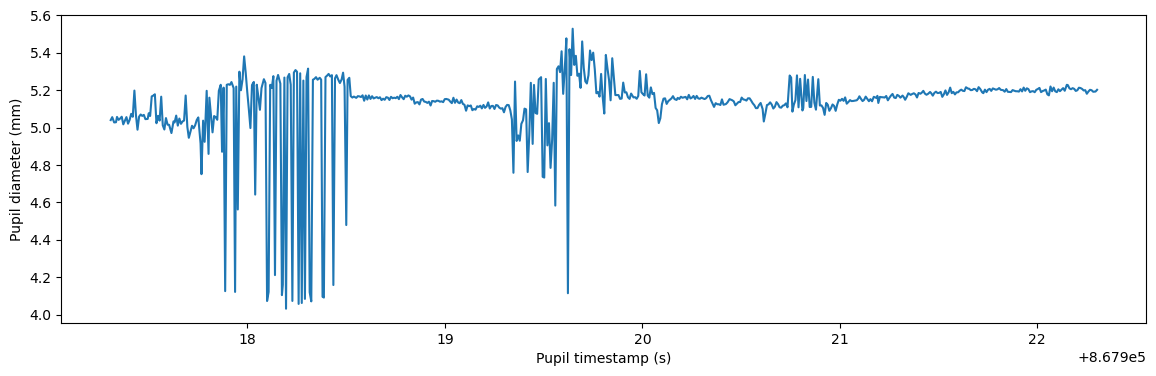

In [19]:
import matplotlib.pyplot as plt
from pyplr.utils import unpack_data_pandas

data = unpack_data_pandas(data, cols=['timestamp','diameter_3d'])
ax = data['diameter_3d'].plot(figsize=(14,4))
ax.set_ylabel('Pupil diameter (mm)')
ax.set_xlabel('Pupil timestamp (s)')